## Multiple Linear Regression

### Multiple regression is to learn more about the relationship between several independent variables and a dependent variable.

<img src='images/multiple_reg.PNG' />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### importing dataset

In [2]:
data = pd.read_csv('dataset/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Encoding categorical data

In [3]:
data_new = data.iloc[:,:-1]

In [4]:
data_new.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [5]:
col=data_new.columns
print col.tolist()
c=list(col)
c

['R&D Spend', 'Administration', 'Marketing Spend', 'State']


['R&D Spend', 'Administration', 'Marketing Spend', 'State']

In [30]:
data2 = pd.get_dummies(data_new[data_new.columns])
#get_dummies:create dummy variables

In [7]:
data2.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [9]:
data2.describe()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000,1.000000


In [8]:
data2.shape

(50, 6)

### Split dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=data2.iloc[:,:].values
#type(X)

In [16]:
y=data.iloc[:,4].values

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [19]:
print X_train.shape
X_test.shape

(35L, 6L)


(15L, 6L)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [21]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print reg.coef_
reg.intercept_

[ 7.90840255e-01  3.01968165e-02  3.10148566e-02 -2.55942855e+02
  2.07086137e+02  4.88567184e+01]


42659.8137255285

In [23]:
y_pred = reg.predict(X_test)

In [24]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54,  96712.8 , 124266.9 ])

In [25]:
y_pred

array([104282.76472171, 132536.88499212, 133910.85007767,  72584.77489417,
       179920.9276189 , 114549.31079233,  66444.43261347,  98404.96840122,
       114499.82808602, 169367.50639895,  96522.6253998 ,  88040.6718287 ,
       110949.99405525,  90419.1897851 , 128020.46250064])

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,y_pred)

0.9358680970046519

In [31]:
import seaborn as sb

In [32]:
data_new['Profit']=data['Profit']

In [33]:
data_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
%matplotlib inline

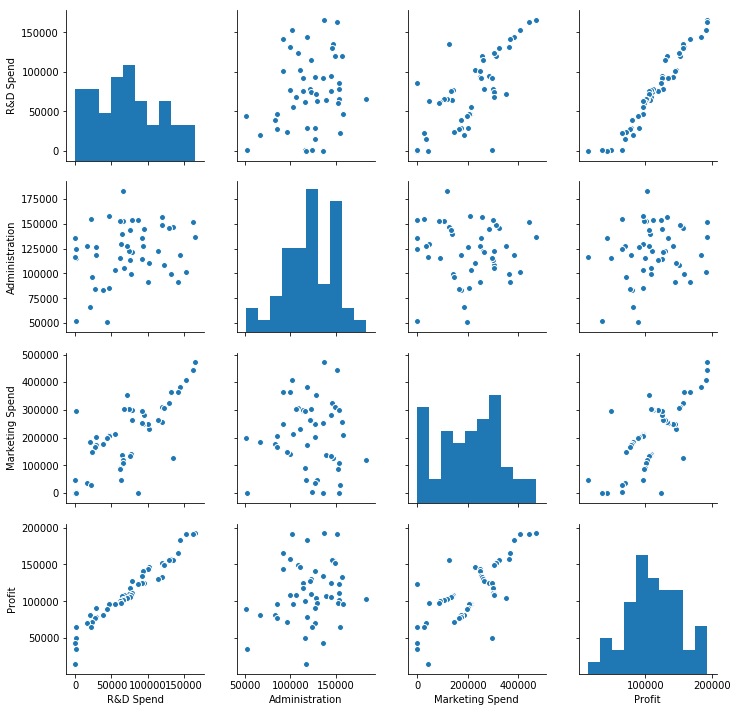

In [35]:
sb.pairplot(data_new)


In [ ]:
sb.heatmap(data_new.corr(),annot=True)

In [36]:
data_new.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [37]:
data_new.iloc[:,[0,4]].head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


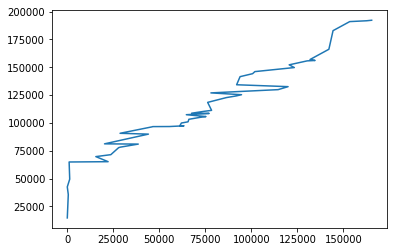

In [38]:
plt.plot(data_new['R&D Spend'].values,data_new['Profit'].values)

In [ ]:
X_test[0]

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
t=X_test[0]

In [ ]:
t

In [ ]:
s=[]
for t in X_test:
    
    s.append(reg.intercept_+reg.coef_[0]t[0]+reg.coef_[1]t[1]....)
print s

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
d=load_boston()

In [ ]:
d.data.shape

In [ ]:
d.target.shape